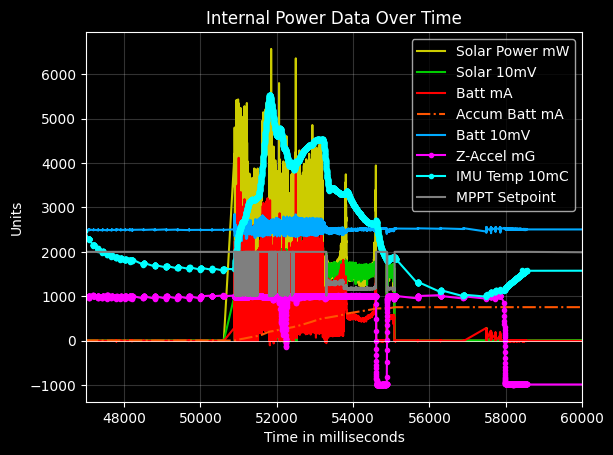

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# filename = 'K2MPPT_DumpCycle12a.csv'
# filename = 'K2MPPT_22Nov2023_0000_14hr.log'
# filename = 'K2MPPT_1Dec2023_0010PST_198hr.log'
# filename = 'K2MPPT_28Feb2024.csv'
# filename = 'K2MPPT_27Feb2024-FullSet.csv'
# filename = 'K2MPPT_18Jan2024_2230PST_980hr.log'
# filename = 'K2MPPT_7March2024_Debugging2.log'
# filename = 'K2MPPT_11March2024_0000PST_17hr.log'
filename = 'K2MPPT_11March2024_0000PST_63hr.log'
dataframe = pd.read_csv(filename)

# dataframe["TS"] = pd.to_datetime(dataframe['DSTM32 Time sec']) # , format="%Y-%m-%d")

# fig, ax = plt.subplots()
# ax.plot(dataframe["STM32 Time sec"], dataframe["Solar mA"])
# ax.plot(dataframe["STM32 Time sec"], dataframe["Temperature ADC"])
# fig.autofmt_xdate()
# fig.show()

dataframe['PowerIn'] = dataframe["Solar mA"] * dataframe["Solar 10mV"] / 1000.0
dataframe['PowerOut'] = dataframe["Main mA"] * dataframe["Main 10mV"] / 1000.0
dataframe['CurrTotal'] = (dataframe["Main mA"].cumsum())/3600.0

# plt.plot(dataframe["STM32 Time sec"], marker='.', markersize=2.0, linestyle='None')
# add title
plt.title("Internal Power Data Over Time")
# label axis
plt.ylabel("Units")
plt.xlabel("Time in milliseconds")
plt.style.use('dark_background')
plt.plot(dataframe["STM32 Time sec"], dataframe["PowerIn"],           label='Solar Power mW',               color='#cccc00')
# plt.plot(dataframe["STM32 Time sec"], dataframe["PowerOut"])
plt.plot(dataframe["STM32 Time sec"], dataframe["Solar 10mV"],        label='Solar 10mV',                   color='#00cc00')
plt.plot(dataframe["STM32 Time sec"], dataframe["Main mA"],           label='Batt mA',                      color='#ff0000')
plt.plot(dataframe["STM32 Time sec"], dataframe["CurrTotal"],         label='Accum Batt mA',                color='#ff5500', linestyle='dashdot')
plt.plot(dataframe["STM32 Time sec"], dataframe["Main 10mV"],         label='Batt 10mV',                    color='#00aaff')
plt.plot(dataframe["STM32 Time sec"], dataframe["Accel-Z milliGee"],  label='Z-Accel mG',       marker='.', color='#ff00ff')
plt.plot(dataframe["STM32 Time sec"], dataframe["IMU Temp 10mC"]*1.0, label='IMU Temp 10mC',    marker='.', color='#00ffff')
plt.plot(dataframe["STM32 Time sec"], dataframe["MPPT Setpoint"],     label='MPPT Setpoint',                color='#7f7f7f')
plt.axhline(0, linewidth=0.5, color='#ffffff')
plt.legend(loc=1, borderaxespad=0.5)

plt.grid(alpha=0.2)
#trim to start at value on x axis
plt.xlim(47000, 60000)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
# import numpy as np
# from numpy.fft import fft, ifft

filename = 'SilverLake_Drift_Upright_11March2024.csv'
dataframe = pd.read_csv(filename)

# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html


# dataframe['PowerIn'] = dataframe["Solar mA"] * dataframe["Solar 10mV"] / 1000.0
# dataframe['PowerOut'] = dataframe["Main mA"] * dataframe["Main 10mV"] / 1000.0
# dataframe['CurrTotal'] = (dataframe["Main mA"].cumsum())/3600.0


plt.style.use('dark_background')

plt.subplot(3, 1, 1)
plt.title("Gyro")
plt.plot(dataframe["timestamp(ms)"], dataframe["IMU[0].GyrX"],       label='Gyro X (Roll)',         marker=',', color='#ff0000')
plt.plot(dataframe["timestamp(ms)"], dataframe["IMU[0].GyrY"],       label='Gyro Y (Pitch)',        marker=',', color='#00ff00')
plt.plot(dataframe["timestamp(ms)"], dataframe["IMU[0].GyrZ"],       label='Gyro Z (Yaw)',          marker=',', color='#0000ff')
plt.legend(loc=1, borderaxespad=1.)

plt.subplot(3, 1, 2)
plt.title("Accel")
plt.plot(dataframe["timestamp(ms)"], dataframe["IMU[0].AccX"],       label='Accel X (Surge)',       marker=',', color='#ff0000')
plt.plot(dataframe["timestamp(ms)"], dataframe["IMU[0].AccY"],       label='Accel Y (Sway)',        marker=',', color='#00ff00')
plt.plot(dataframe["timestamp(ms)"], dataframe["IMU[0].AccZ"],       label='Accel Z (Heave)',       marker=',', color='#0000ff')
plt.legend(loc=1, borderaxespad=1.)

plt.subplot(3, 1, 3)
# plt.title("Pose")
# plt.plot(dataframe["timestamp(ms)"], dataframe["XKF1[0].VN"],        label='Velocity - North',      marker=',', color='#ff0000')
# plt.plot(dataframe["timestamp(ms)"], dataframe["XKF1[0].VE"],        label='Velocity - East',       marker=',', color='#00ff00')
# plt.plot(dataframe["timestamp(ms)"], dataframe["XKF1[0].Yaw"],       label='Heading Angle',         marker=',', color='#0000ff')

# X = fft(dataframe["IMU[0].GyrY"])
# N = len(X)
# n = np.arange(N)
# T = N/10
# freq = n/T

freq = 10
f, Pxx_den_gyro_y  = signal.periodogram(dataframe["IMU[0].GyrY"], freq)
f, Pxx_den_accel_z = signal.periodogram(dataframe["IMU[0].AccZ"], freq)
# f, Pxx_spec = signal.periodogram(dataframe["IMU[0].GyrY"], freq, 'blackmanharris', scaling='spectrum')
plt.semilogy(f, Pxx_den_gyro_y,  label='Gyro Y deg/s (Roll)')
plt.semilogy(f, Pxx_den_accel_z, label='Accel Z m/s^2 (Surge)')
# plt.semilogy(f, Pxx_spec)
plt.ylim([1e-5, 1e1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [(Unit)^2/Hz]')
plt.legend(loc=1, borderaxespad=1.)

# plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
# plt.xlabel('Freq (Hz)')
# plt.ylabel('FFT Amplitude |X(freq)|')
# plt.xlim(0, 5)





# plt.axhline(0, linewidth=0.5, color='#ffffff')
# plt.legend(loc=1, borderaxespad=1.)

plt.grid(alpha=0.2)
plt.suptitle("Wave Spectra")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'SilverLake_Drift_Upright_11March2024.csv'